<div style="text-align: right;">
    <strong>Author:</strong> Mizanu Zelalem Degu  <br>
    <strong>Institution:</strong> Jimma University Institute of Technology  <br>
    Image Processing  - lab2
</div>

<a href='https://colab.research.google.com/github/mizgithub/Image-processing-lab-exercises/blob/main/ImageProcessingLab2.ipynb' target='_blank'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open in Colab'/></a>

# Lab 2: Spatial Domain Filtering

## 2.1 Basic Algorithm of Spatial Domain Filtering

Spatial domain filtering operates directly on pixel values. The basic algorithm involves:

Defining a filter kernel (small matrix)

Placing the kernel over each pixel

Computing a weighted sum of neighborhood pixels

Replacing the center pixel with the computed value

Mathematically, for a kernel w of size m×n centered at (x,y):

g(x,y) = Σ_{s=-a}^a Σ_{t=-b}^b w(s,t) * f(x+s, y+t)

Where a=(m-1)/2, b=(n-1)/2

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 2.2.1 Average Smoothing

Average filtering replaces each pixel with the average of its neighbors, reducing noise but also blurring edges.

The kernel for 3×3 average filter is:
1/9 * [[1, 1, 1],
[1, 1, 1],
[1, 1, 1]]

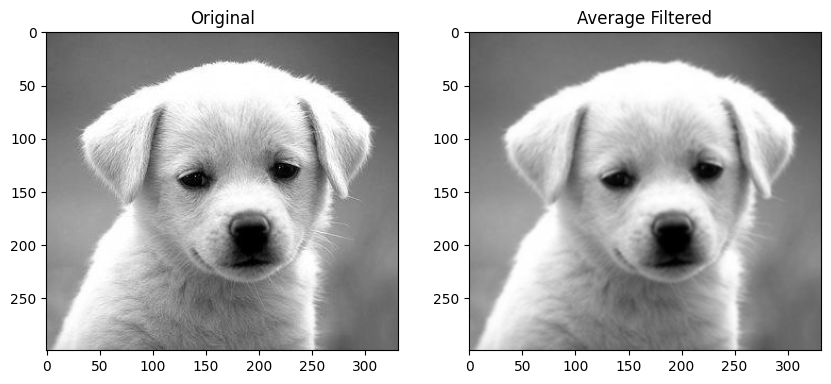

In [6]:
def average_filter(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size**2)
    return cv2.filter2D(image, -1, kernel)
    
gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
avg_img = average_filter(gray_img)
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(avg_img, cmap='gray'), plt.title('Average Filtered')
plt.show()

### 2.2.2 Gaussian Blurring

Gaussian blur uses a kernel with weights following a 2D Gaussian distribution, providing smoother results than average filtering.

The 2D Gaussian kernel is given by:
G(x,y) = (1/(2πσ²)) * exp(-(x²+y²)/(2σ²))

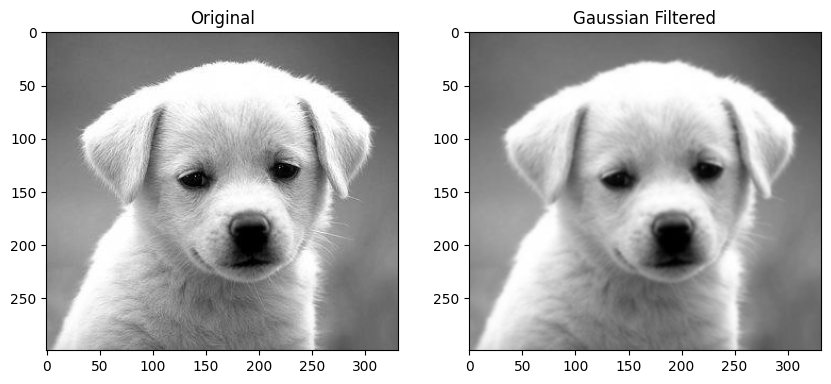

In [7]:
def gaussian_filter(image, kernel_size=5, sigma=1.0):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
gauss_img = gaussian_filter(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(gauss_img, cmap='gray'), plt.title('Gaussian Filtered')
plt.show()

## 2.3 Image Sharpening in Spatial Domain

### 2.3.1 Laplacian

The Laplacian is a second-order derivative operator that highlights intensity discontinuities. The basic 3×3 kernel is:

[[0, 1, 0],
[1, -4, 1],
[0, 1, 0]]

Sharpening is achieved by:
g(x,y) = f(x,y) - ∇²f(x,y)

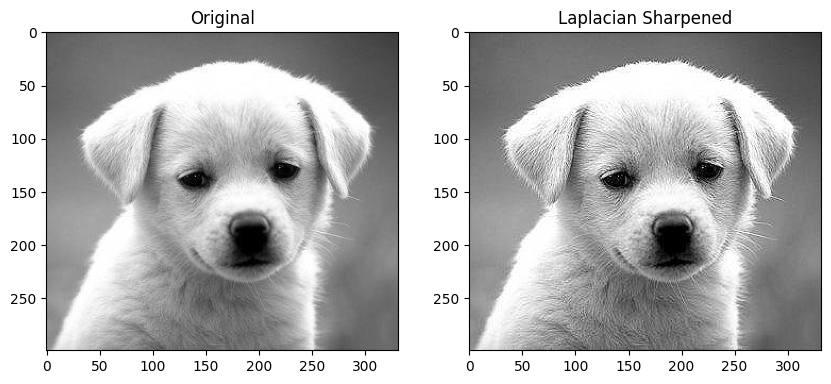

In [8]:
def laplacian_sharpen(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpened = image - 0.5*laplacian
    return np.clip(sharpened, 0, 255).astype(np.uint8)
    
gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
lap_img = laplacian_sharpen(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(lap_img, cmap='gray'), plt.title('Laplacian Sharpened')
plt.show()

### 2.3.2 Sobel

Sobel operator computes gradient magnitude for edge detection using two 3×3 kernels:

Gx = [[-1, 0, 1], Gy = [[-1, -2, -1],
[-2, 0, 2], [ 0, 0, 0],
[-1, 0, 1]] [ 1, 2, 1]]

Gradient magnitude: G = √(Gx² + Gy²)

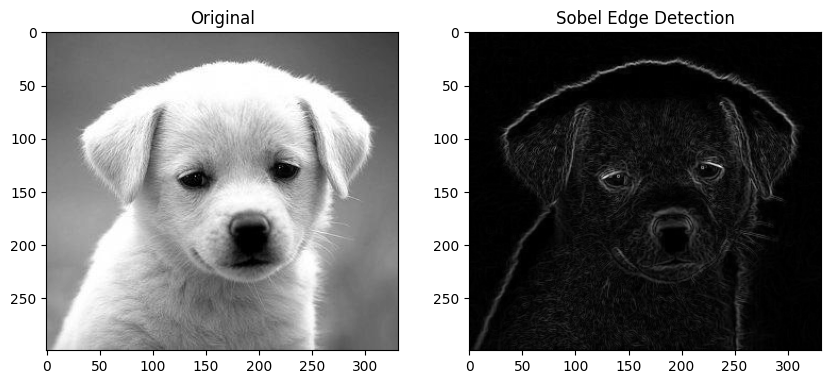

In [9]:
def sobel_edge_detection(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    return (magnitude * 255 / magnitude.max()).astype(np.uint8)

gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
sobel_img = sobel_edge_detection(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(sobel_img, cmap='gray'), plt.title('Sobel Edge Detection')
plt.show()

## 2.4 Non-linear Filtering

### 2.4.1 Median Filter

Median filtering replaces each pixel with the median of its neighborhood, effective for salt-and-pepper noise while preserving edges.

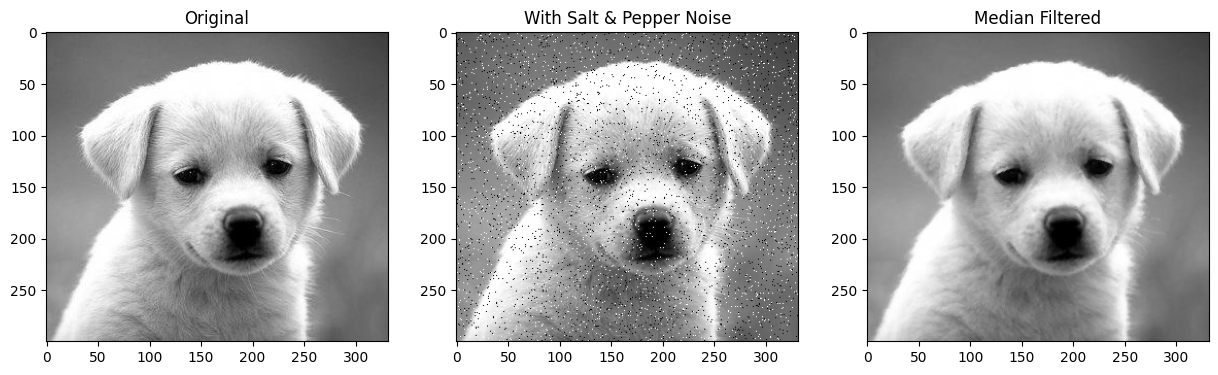

In [11]:
def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

# Add salt-and-pepper noise first
def add_salt_pepper_noise(image, prob=0.05):
    noisy = np.copy(image)
    salt = np.random.rand(*image.shape) < prob/2
    pepper = np.random.rand(*image.shape) < prob/2
    noisy[salt] = 255
    noisy[pepper] = 0
    return noisy

gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
noisy_img = add_salt_pepper_noise(gray_img)
med_img = median_filter(noisy_img)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(noisy_img, cmap='gray'), plt.title('With Salt & Pepper Noise')
plt.subplot(133), plt.imshow(med_img, cmap='gray'), plt.title('Median Filtered')
plt.show()

### 2.4.2 Bilateral Filter

Bilateral filtering smoothes while preserving edges by considering both spatial and intensity differences:

BF[I]p = 1/W_p Σ{q∈S} G_σs(||p-q||) G_σr(|I_p-I_q|) I_q

Where:

G_σs: spatial Gaussian

G_σr: range (intensity) Gaussian

W_p: normalization facto

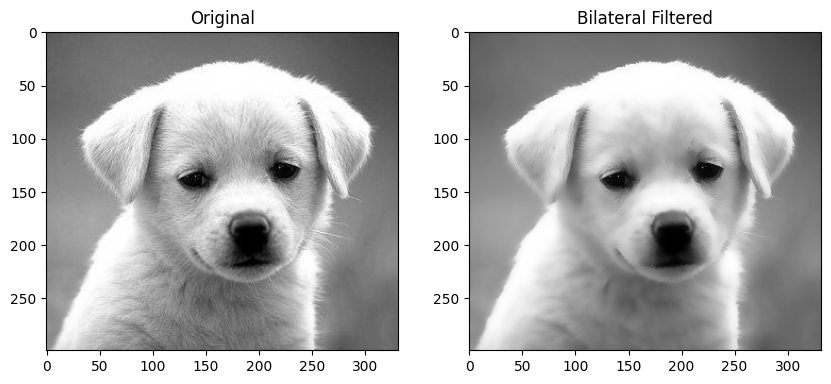

In [13]:
def bilateral_filter(image, d=9, sigma_color=25, sigma_space=25):
    return cv2.bilateralFilter(image, d, sigma_color, sigma_space)

gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
bilat_img = bilateral_filter(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(bilat_img, cmap='gray'), plt.title('Bilateral Filtered')
plt.show()